In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale as sk_scale
from sklearn.preprocessing import StandardScaler
from umap import UMAP

plt.rcParams.update({"font.size":16})

In [44]:
PATH = os.getcwd()
DATAPATH = os.path.join(PATH, "data")
SAVEPATH = os.path.join(PATH,"plots")

filenames = {
    "X_test": "test_in - Copy.csv",
    "X_train": "train_in - Copy.csv",
    "y_test": "test_out - Copy.csv",
    "y_train": "train_out - Copy.csv",
}

# Import all data files
X_train = pd.read_csv(os.path.join(DATAPATH, filenames["X_train"]), header=None)
y_train = pd.read_csv(
    os.path.join(DATAPATH, filenames["y_train"]), header=None, names=["digit"]
)
expected_train = pd.get_dummies(y_train.digit).to_numpy()

X_test = pd.read_csv(os.path.join(DATAPATH, filenames["X_test"]), header=None)
y_test = pd.read_csv(
    os.path.join(DATAPATH, filenames["y_test"]), header=None, names=["digit"]
)

In [45]:
def center_img(X, y, digit: int):
    """Calculate the center of the cloud in 256 dim space for `digit` using data `X` and labels `y`"""
    return X[y.digit == digit].mean()


def show_img(X, shape=(16, 16)):
    """Show image of digit in `X`. Specifying the `shape` is optional"""
    plt.figure()
    plt.imshow(X.to_numpy().reshape(shape), cmap="Greys")
    plt.show()


def dist(src, dst):
    """Calculate the distance between `src` and `dst` using norm 2 distance"""
    return np.sqrt(((src - dst) ** 2).sum())


def classify(X_test, X_train=X_train, y_train=y_train):
    """Classify all test cases in `X_test` using the training data `X_train` and labels `y_train`"""
    centers = [center_img(X_train, y_train, digit) for digit in range(10)]
    output = []
    for _, img in X_test.iterrows():
        distances = [dist(img, center) for center in centers]
        output.append(np.argmin(distances))
    return pd.DataFrame(output, columns=["digit"])


def accuraccy(y_test: pd.DataFrame, y_out: pd.DataFrame):
    return len(y_test[y_test.eq(y_out).digit]) / len(y_test)


def calculate_distances(X_test, X_train=X_train, y_train=y_train) -> pd.DataFrame:
    """Classify all test cases in `X_test` using the training data `X_train` and labels `y_train`"""
    centers = [center_img(X_train, y_train, digit) for digit in range(10)]
    output = []
    for _, img in X_test.iterrows():
        output.append([dist(img, center) for center in centers])
    return pd.DataFrame(output)


def classify_dist_ij(dist_ij: pd.DataFrame, y: pd.DataFrame):
    """Classify all test cases using the distance matrix generated in `calculate_distances`"""
    return dist_ij.apply(np.argmin, axis=1).copy()

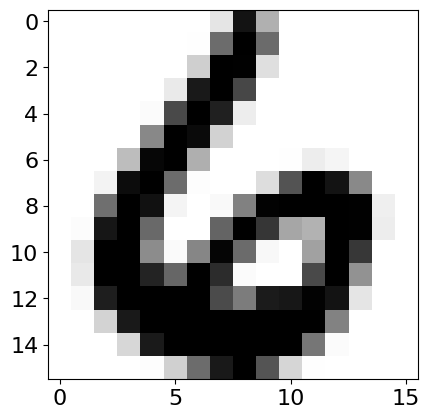

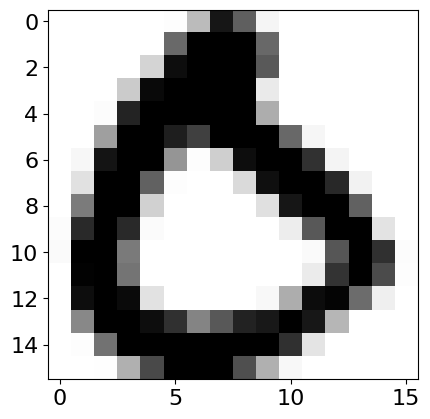

In [46]:
# Show first image in the training and test set to show data
show_img(X_train.iloc[0])
show_img(X_test.iloc[0])

# Task 1.1i: Calculate the centers

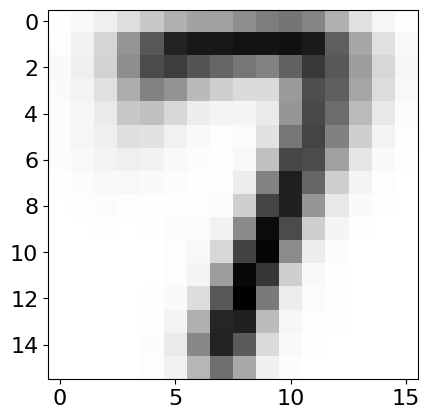

In [47]:
# Calculate center image of digits
center_7 = center_img(X_train, y_train, 7)
show_img(center_7)

# Task 1.1ii: Calculate the distances between the centers of the 10 clouds

In [48]:
centers = [center_img(X_train, y_train, digit) for digit in range(10)]
# Calculate all the distances for all possible combinations of centers
centers_dist = [
    dist(c1, c2)
    for i, c1 in enumerate(centers)
    for j, c2 in enumerate(centers)
    if i > j
]

# Task 1.1iii: What can you say about the expected accuraccy of the classifier?

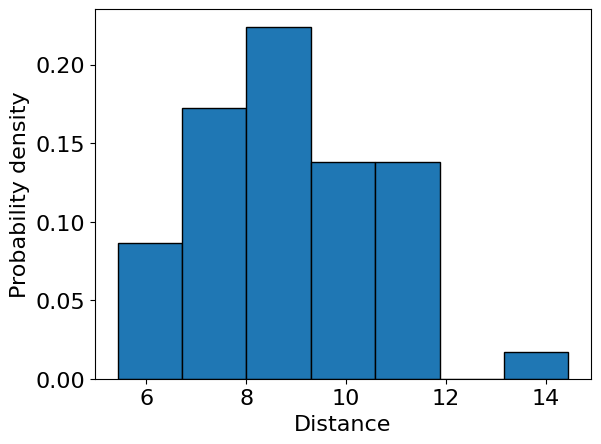

We see that most distances are in the range [25, 150].
We expect that the classification between centers is most difficult
 for those that have a distance that lays within this range.


In [49]:
plt.figure()
plt.hist(
    centers_dist,
    bins=int(2 * (len(centers_dist)) ** (1 / 3)),
    density=True,
    edgecolor="k",
)
plt.xlabel("Distance")
plt.ylabel("Probability density")
# plt.savefig(os.path.join(SAVEPATH,"dist_11i.png"),bbox_inches='tight',dpi=250)
plt.show()
print(
    "We see that most distances are in the range [25, 150].\nWe expect that the classification between centers is most difficult\n for those that have a distance that lays within this range."
)

In [50]:
centers = [center_img(X_train, y_train, digit) for digit in range(10)]
dist_ij = np.array(
    [
        (i, j, np.round(dist(c1, c2), 3))
        for i, c1 in enumerate(centers)
        for j, c2 in enumerate(centers)
        if i > j
    ],
    dtype=[("digit1", int), ("digit2", int), ("distance", float)],
).T
print(np.sort(dist_ij, order="distance"))
print(
    "We see that the 9-7 and 9-4 pair are most difficult to separate,\n which is to be expected looking at the form of the digits."
)

[(9, 7,  5.426) (9, 4,  6.01 ) (5, 3,  6.119) (9, 8,  6.401)
 (6, 5,  6.699) (8, 5,  6.967) (8, 3,  7.02 ) (8, 2,  7.078)
 (6, 2,  7.332) (8, 4,  7.381) (5, 0,  7.519) (7, 4,  7.583)
 (5, 2,  7.907) (4, 2,  7.933) (5, 4,  8.002) (6, 0,  8.154)
 (3, 2,  8.178) (9, 5,  8.259) (9, 3,  8.354) (8, 7,  8.468)
 (8, 6,  8.587) (6, 4,  8.782) (7, 2,  8.873) (9, 2,  8.888)
 (7, 3,  8.922) (4, 3,  9.088) (3, 0,  9.144) (7, 5,  9.212)
 (6, 3,  9.302) (2, 0,  9.335) (8, 0,  9.908) (9, 1,  9.932)
 (8, 1, 10.087) (2, 1, 10.125) (4, 1, 10.174) (9, 6, 10.44 )
 (6, 1, 10.615) (7, 1, 10.743) (4, 0, 10.77 ) (7, 6, 10.888)
 (5, 1, 11.119) (9, 0, 11.489) (3, 1, 11.733) (7, 0, 11.865)
 (1, 0, 14.45 )]
We see that the 9-7 and 9-4 pair are most difficult to separate,
 which is to be expected looking at the form of the digits.


# Task 1.2i: PCA, U-MAP, T-SNE

In [51]:
def show_reducer_accuraccy(reducer, scaler, name,savename=None):
    X_train_norm = StandardScaler().fit_transform(X_train)
    red_train = pd.DataFrame(reducer.fit_transform(X_train_norm))
    X_test_norm = scaler.fit_transform(X_test)
    red_test = pd.DataFrame(reducer.fit_transform(X_test_norm))
    y_out = classify(red_test, X_train=red_train)
    acc = accuraccy(y_test, y_out)
    centers = [center_img(red_train, y_train, digit) for digit in range(10)]
    print(f"The accuraccy with 2 component {name} is: {acc:.3f}")
    dist_ij = np.array(
        [
            (i, j, round(dist(c1, c2), 3))
            for i, c1 in enumerate(centers)
            for j, c2 in enumerate(centers)
            if i > j
        ],
        dtype=[("digit1", int), ("digit2", int), ("distance", float)],
    ).T
    print(np.sort(dist_ij, order="distance"))

    fig, axs = plt.subplots(2, 1, figsize=(8, 10), sharex=True, sharey=True)
    # fig.suptitle(f"{name} visualisation")
    axs[0].set_title("Assigned labels")
    axs[0].set_xlabel(f"{name} component 0")
    axs[0].set_ylabel(f"{name} component 1")
    axs[1].set_title("True labels")
    axs[1].set_xlabel(f"{name} component 0")
    axs[1].set_ylabel(f"{name} component 1")

    for digit in range(10):
        axs[0].annotate(digit, centers[digit], size="large")
        axs[0].scatter(
            red_test.loc[y_out.digit == digit, 0],
            red_test.loc[y_out.digit == digit, 1],
            zorder=-1,
            alpha=0.7,
            label=str(digit),
        )
        axs[1].annotate(digit, centers[digit], size="large")
        axs[1].scatter(
            red_test.loc[y_test.digit == digit, 0],
            red_test.loc[y_test.digit == digit, 1],
            zorder=-1,
            alpha=0.7,
            label=f"{digit = }",
        )

    axs[0].legend(bbox_to_anchor=(1.2,0.5))
    # axs[1].legend()
    if savename == None:
        plt.show()
    else:
        plt.savefig(os.path.join(SAVEPATH,savename),bbox_inches='tight',dpi=300)
        plt.show()

The accuraccy with 2 component PCA is: 0.297
[(8, 4,  0.411) (5, 3,  1.687) (6, 2,  2.657) (9, 4,  2.821)
 (4, 3,  2.822) (8, 3,  2.914) (5, 2,  3.077) (9, 8,  3.127)
 (9, 7,  3.396) (3, 2,  3.756) (8, 2,  4.077) (8, 5,  4.169)
 (5, 4,  4.202) (4, 2,  4.38 ) (9, 3,  5.023) (6, 5,  5.463)
 (7, 4,  5.583) (8, 7,  5.979) (6, 3,  6.393) (8, 6,  6.451)
 (7, 3,  6.553) (9, 5,  6.655) (6, 4,  6.806) (9, 2,  7.197)
 (5, 0,  7.467) (7, 5,  8.201) (8, 1,  8.388) (2, 0,  8.529)
 (6, 0,  8.697) (4, 1,  8.7  ) (6, 1,  8.909) (2, 1,  9.057)
 (3, 0,  9.076) (9, 1,  9.412) (9, 6,  9.556) (7, 2,  9.732)
 (3, 1, 10.974) (5, 1, 11.506) (8, 0, 11.556) (4, 0, 11.64 )
 (7, 6, 12.303) (7, 1, 12.729) (9, 0, 14.099) (7, 0, 15.126)
 (1, 0, 17.395)]


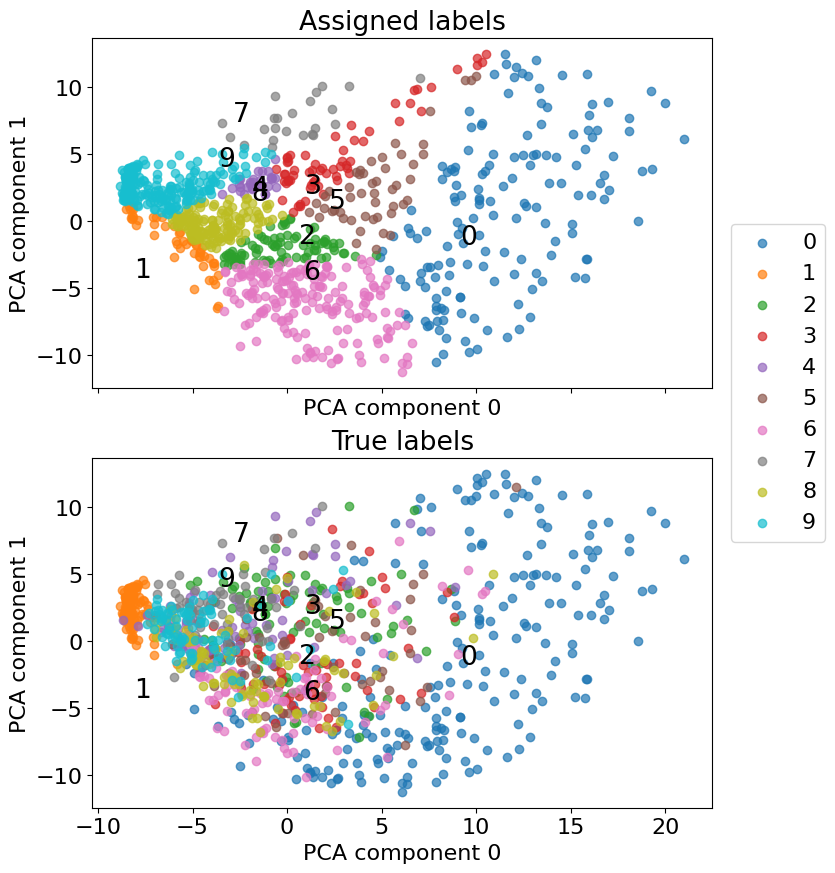

The accuraccy with 2 component UMAP is: 0.011
[(5, 3,  0.74699998) (9, 7,  1.33899999) (9, 4,  1.69200003)
 (8, 3,  1.86899996) (8, 5,  2.43000007) (3, 2,  2.58699989)
 (6, 0,  2.6400001 ) (7, 4,  2.65499997) (8, 2,  3.08100009)
 (5, 2,  3.21199989) (6, 5,  3.76600003) (4, 2,  4.12300014)
 (8, 4,  4.14499998) (6, 3,  4.26100016) (8, 7,  4.36100006)
 (4, 1,  4.50099993) (9, 8,  4.78399992) (5, 0,  4.96700001)
 (2, 1,  4.97599983) (6, 2,  5.28100014) (4, 3,  5.4289999 )
 (9, 2,  5.59899998) (3, 0,  5.67000008) (7, 2,  5.91699982)
 (9, 1,  5.95699978) (8, 6,  6.12699986) (7, 3,  6.15700006)
 (5, 4,  6.16699982) (9, 3,  6.40299988) (7, 5,  6.78299999)
 (9, 5,  7.09800005) (7, 1,  7.12799978) (8, 1,  7.2579999 )
 (8, 0,  7.34800005) (2, 0,  7.4380002 ) (3, 1,  7.49800014)
 (5, 1,  8.17099953) (6, 4,  9.24600029) (6, 1,  9.72200012)
 (7, 6, 10.38300037) (9, 6, 10.4829998 ) (4, 0, 11.06599998)
 (7, 0, 11.70300007) (9, 0, 12.06400013) (1, 0, 12.17000008)]


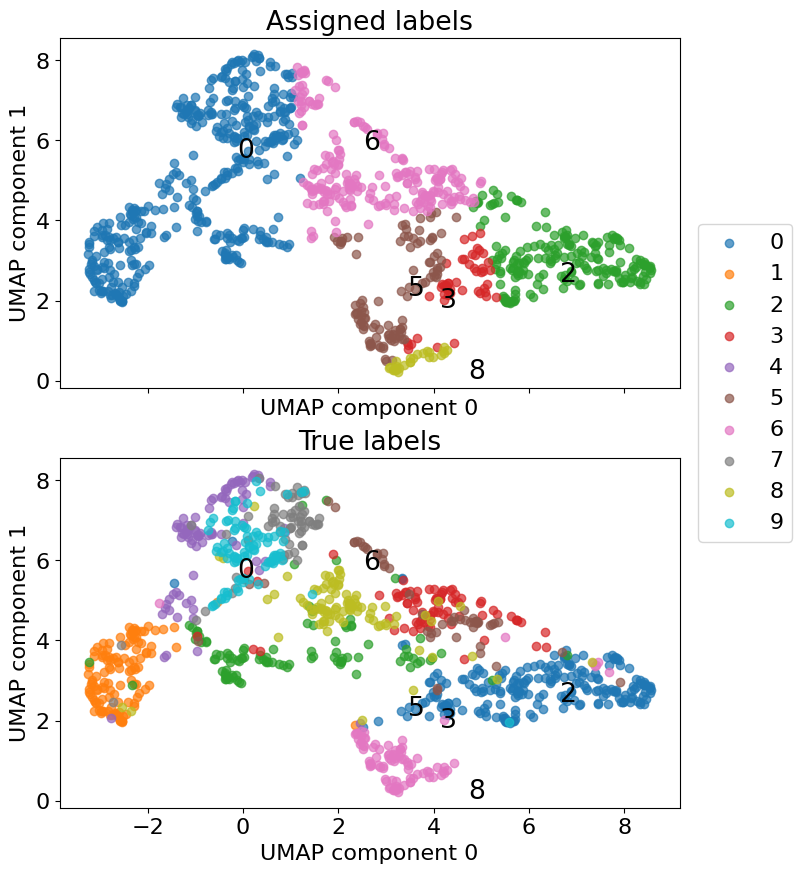

The accuraccy with 2 component T-SNE is: 0.268
[(5, 3,  2.88499999) (9, 4,  6.55999994) (9, 7, 14.37699986)
 (8, 5, 18.4109993 ) (8, 3, 18.48600006) (7, 4, 20.63500023)
 (8, 4, 24.17200089) (8, 2, 24.61499977) (9, 8, 24.8920002 )
 (8, 7, 27.15299988) (6, 0, 29.19799995) (3, 2, 30.87400055)
 (2, 1, 30.93600082) (6, 2, 31.38800049) (3, 0, 32.67399979)
 (5, 2, 33.03900146) (5, 0, 34.49700165) (4, 2, 37.39199829)
 (7, 5, 38.43500137) (4, 1, 39.68799973) (7, 3, 40.25099945)
 (6, 3, 40.3219986 ) (9, 5, 41.38199997) (9, 2, 41.83300018)
 (5, 4, 41.98600006) (9, 3, 42.31600189) (4, 3, 42.48500061)
 (6, 5, 43.18600082) (8, 1, 45.60200119) (9, 1, 46.23600006)
 (2, 0, 47.19599915) (8, 6, 48.00699997) (8, 0, 49.41799927)
 (7, 2, 49.64599991) (6, 1, 57.08399963) (3, 1, 59.20399857)
 (7, 1, 59.63600159) (5, 1, 60.70600128) (6, 4, 67.41400146)
 (9, 6, 70.78299713) (7, 0, 72.89399719) (4, 0, 73.36000061)
 (9, 0, 74.23000336) (7, 6, 75.14299774) (1, 0, 77.83999634)]


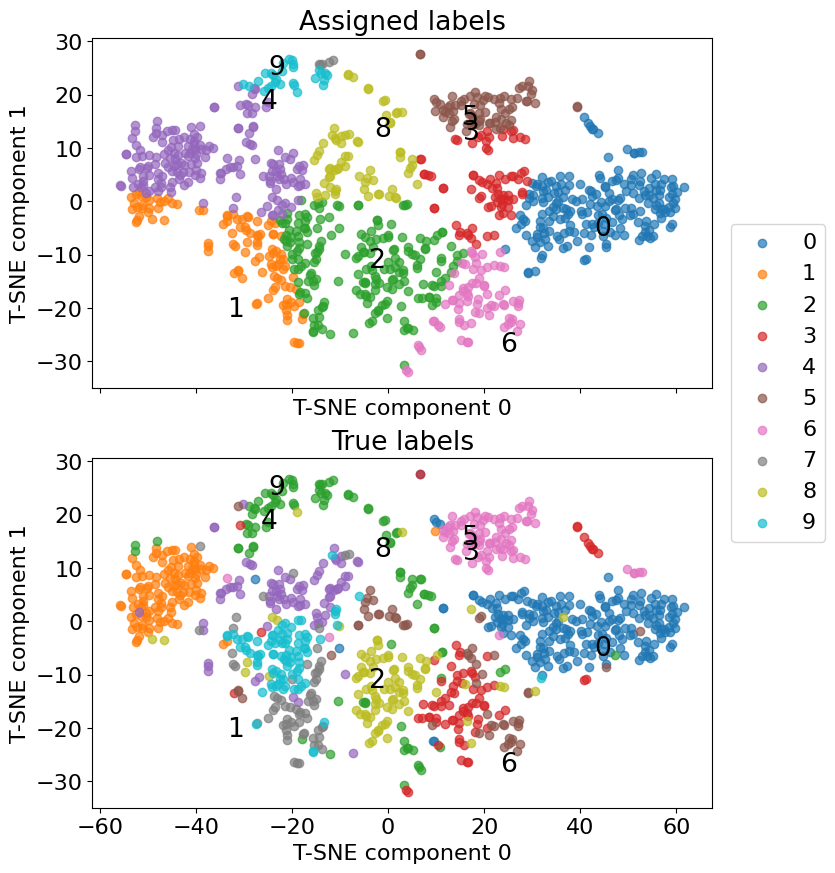

In [52]:
show_reducer_accuraccy(PCA(2), StandardScaler(), "PCA")#,"PCA_ex12.png")
show_reducer_accuraccy(UMAP(), StandardScaler(), "UMAP")#,"UMAP_ex12.png")
show_reducer_accuraccy(TSNE(2), StandardScaler(), "T-SNE")#,"TSNE_ex12.png")

# Task 1.2ii: Conclusion

We expected, looking at the distance matrix, that the pairs with low distance should be close to one another.
While the pairs with a high distance should be far away from one another.
## PCA
We see in PCA that 8-4, 5-3, and 6-2 are very close together, while 1-0, 7-0, and 9-0 are far away.
This is expected looking at the dist_ij matrix.
## U-MAP
We see in U-MAP that 5-3, 9-7, and 9-4 are very close together, while 9-0, 7-0, and 4-0 are far away.
This is expected looking at the dist_ij matrix.
## T-SNE
We see in T-SNE that 5-3, 9-4, and 9-7 are very close together, while 1-0, 7-6, and 9-0 are far away.
This is expected looking at the dist_ij matrix.

# Task 1.3

In [53]:
# Create nearest mean classifier
def NM_classifier(X_test, X_train=X_train, y_train=y_train):
    """Classify all test cases in `X_test` using nearest mean of the training data `X_train` and labels `y_train`"""
    centers = [center_img(X_train, y_train, digit) for digit in range(10)]
    output = []
    for _, img in X_test.iterrows():
        distances = [dist(img, center) for center in centers]
        output.append(np.argmin(distances))
    return pd.DataFrame(output, columns=["digit"])

In [54]:
# Apply NM_classifier to all training data
y_out = NM_classifier(X_train)
acc = accuraccy(y_train, y_out)
print(f"Accuraccy of NM classifier on training data: {acc:0.3f}")

y_out = NM_classifier(X_test)
acc = accuraccy(y_test, y_out)
print(f"Accuraccy of NM classifier on testing data: {acc:0.3f}")

Accuraccy of NM classifier on training data: 0.864
Accuraccy of NM classifier on testing data: 0.804


# Task 1.4i: Setting up KNN

Accuraccy of KNN classifier on training data: 0.979
Accuraccy of KNN classifier on testing data: 0.914


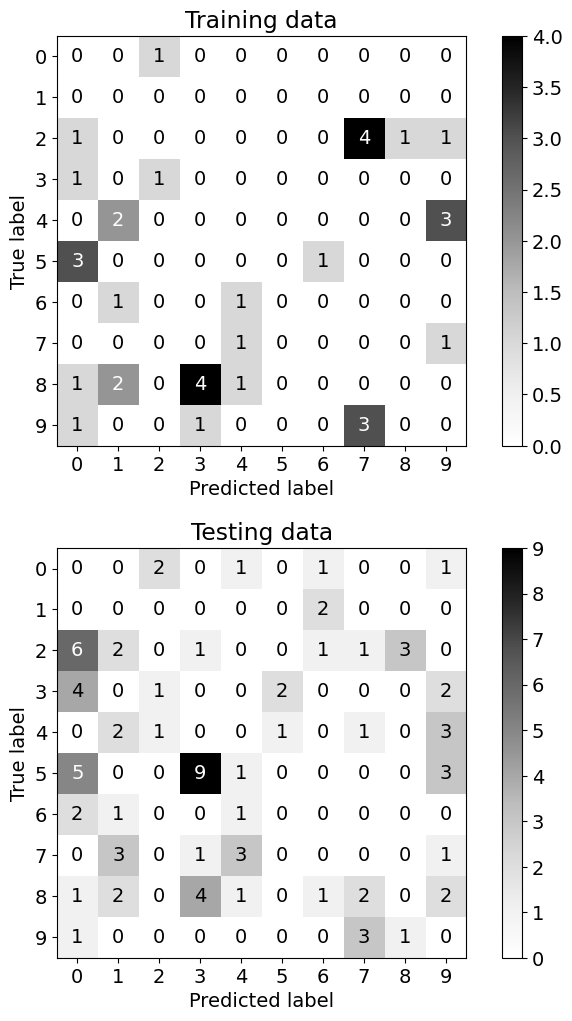

In [55]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

plt.rcParams.update({'font.size':14})
# Setup KNN classifier with k = 3
knn = KNeighborsClassifier(3)
knn.fit(X_train, y_train.digit)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))
fig.tight_layout()
plt.subplots_adjust(hspace=0.25)
ax1.set_title("Training data")
ax2.set_title("Testing data")

y_out = pd.DataFrame(knn.predict(X_train.values), columns=["digit"])
acc = accuraccy(y_train, y_out)
cm = confusion_matrix(y_train, y_out)
for i in range(10):
    cm[i, i] = 0
CMD = ConfusionMatrixDisplay(cm, display_labels=list(range(10)))
CMD.plot(ax=ax1, cmap="Greys")
print(f"Accuraccy of KNN classifier on training data: {acc:0.3f}")

y_out = pd.DataFrame(knn.predict(X_test.values), columns=["digit"])
acc = accuraccy(y_test, y_out)
cm = confusion_matrix(y_test, y_out)
for i in range(10):
    cm[i, i] = 0
CMD = ConfusionMatrixDisplay(cm, display_labels=list(range(10)))
CMD.plot(ax=ax2, cmap="Greys")
print(f"Accuraccy of KNN classifier on testing data: {acc:0.3f}")

# plt.savefig(os.path.join(SAVEPATH,"1iv_matrices.png"),bbox_inches='tight',dpi=300)
plt.show()